In [ ]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x /content/drive/MyDrive/dataset.rar

Streaming output truncated to the last 5000 lines.
Extracting  dataset/spheal/spheal_29.png                                  82%  OK 
Extracting  dataset/spheal/spheal_3.png                                   82%  OK 
Extracting  dataset/spheal/spheal_30.png                                  82%  OK 
Extracting  dataset/spheal/spheal_31.png                                  82%  OK 
Extracting  dataset/spheal/spheal_32.png                                  82%  OK 
Extracting  dataset/spheal/spheal_33.png                                  82%  OK 
Extracting  dataset/spheal/spheal_34.png                                  82%  OK 
Extracting  dataset/spheal/spheal_35.png                                  82%  OK 
Extracting  dataset/spheal/spheal_36.png                                  82%  OK 
Extracting  dataset/spheal/spheal_37.png                                  82%  OK 
Extracting  dataset/spheal/sp

In [ ]:
count = 0
dirs = os.listdir('/content/dataset')
for dir in dirs:
    files = list(os.listdir('dataset/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'PokemonData Folder has '+ str(count) + ' Images')

chinchou Folder has 40 Images
cubone Folder has 40 Images
shellos Folder has 32 Images
clawitzer Folder has 16 Images
misdreavus Folder has 40 Images
throh Folder has 20 Images
trevenant Folder has 16 Images
wailmer Folder has 38 Images
kirlia Folder has 38 Images
vespiquen Folder has 32 Images
dusclops Folder has 38 Images
yveltal Folder has 16 Images
frigibax Folder has 6 Images
happiny Folder has 32 Images
chandelure Folder has 20 Images
vikavolt Folder has 16 Images
drilbur Folder has 20 Images
tornadus-incarnate Folder has 20 Images
quaxly Folder has 6 Images
politoed Folder has 40 Images
tyranitar Folder has 40 Images
torterra Folder has 32 Images
chansey Folder has 40 Images
pikipek Folder has 16 Images
muk Folder has 40 Images
vileplume Folder has 40 Images
abomasnow Folder has 40 Images
rockruff Folder has 16 Images
heracross Folder has 40 Images
eelektross Folder has 20 Images
quaxwell Folder has 6 Images
venusaur Folder has 40 Images
masquerain Folder has 38 Images
torchic F

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/dataset', output='split_Data', ratio=(.7,.2,.1), seed=42)

Copying files: 26539 files [00:07, 3786.01 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Paths to the split data
base_dir = '/content/split_Data'
train_dir = base_dir + '/train'
val_dir = base_dir + '/val'
test_dir = base_dir + '/test'

# Image size and batch size
  # Example: for ResNet, DenseNet, etc.
batch_size = 32
img_size = 128
# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomContrast(0.2)
])

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=42,
    batch_size=batch_size,
    image_size=(img_size, img_size)
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=42,
    batch_size=batch_size,
    image_size=(img_size, img_size)
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=42,
    batch_size=batch_size,
    image_size=(img_size, img_size)
)



Found 18417 files belonging to 1000 classes.
Found 5104 files belonging to 1000 classes.
Found 3018 files belonging to 1000 classes.


In [ ]:
Pokemon_names = train_ds.class_names
len(Pokemon_names)

1000

In [ ]:
# Apply data augmentation to training dataset
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=AUTOTUNE)

# Prefetch datasets for performance
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
import matplotlib.pyplot as plt

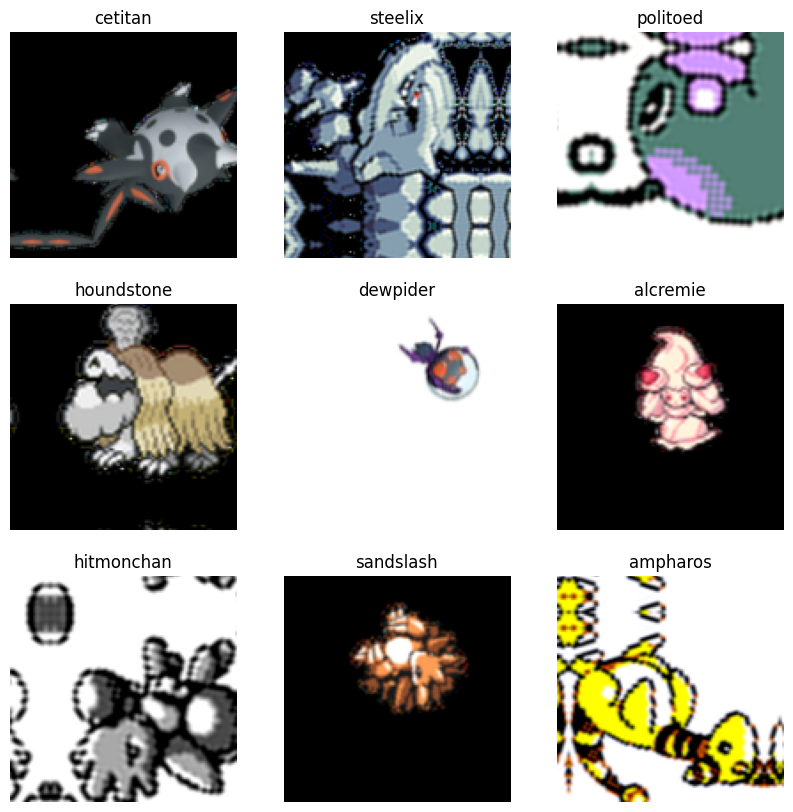

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(Pokemon_names[labels[i]])
        plt.axis('off')

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
# val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
# test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
# from tensorflow.keras import layers, Sequential
# from tensorflow.keras.layers import Input

# data_augmentation = Sequential([
#     Input(shape=(img_size, img_size, 3)),  # Explicitly define the input shape
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1)
# ])


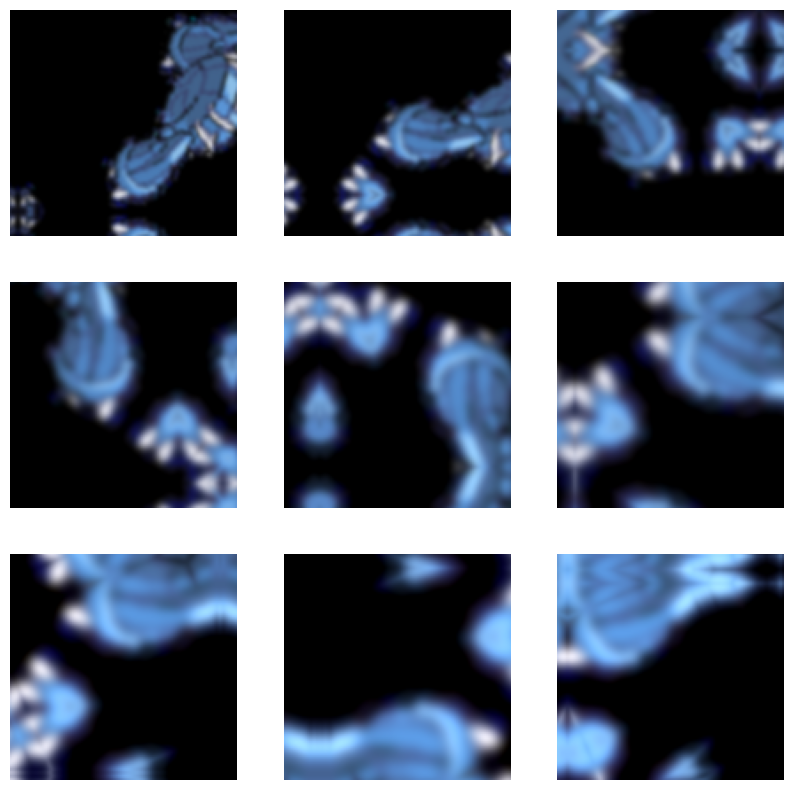

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Activation



In [ ]:
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


In [ ]:
base_model.trainable = False


In [ ]:
from tensorflow.keras import layers, models, regularizers

densenet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),

    layers.Dense(512, kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)),  # Second dense layer
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(1000, activation='softmax', kernel_regularizer=regularizers.l2(0.01))  # Output layer
])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore the best weights after stopping
)


In [ ]:
densenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',  # Adjust if using one-hot encoding
    metrics=['accuracy']
)



In [ ]:
densenet = tf.keras.models.load_model('/content/drive/MyDrive/Dense_201_1000.keras')

In [ ]:
densenet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)             │ (None, 4, 4, 1920)          │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1920)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         983,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │         257,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,696,936 (75.14 MB)

 Trainable params: 1,373,416 (5.24 MB)

 Non-trainable params: 18,323,520 (69.90 MB)

In [ ]:
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))


In [ ]:
history = densenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Set a high maximum to allow early stopping
    callbacks=[early_stopping]
)

Epoch 1/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 220s 299ms/step - accuracy: 0.0012 - loss: 18.5195 - val_accuracy: 0.0092 - val_loss: 12.7851
Epoch 2/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 115s 200ms/step - accuracy: 0.0055 - loss: 12.1223 - val_accuracy: 0.0306 - val_loss: 10.4076
Epoch 3/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 118s 203ms/step - accuracy: 0.0138 - loss: 10.0196 - val_accuracy: 0.0498 - val_loss: 8.9607
Epoch 4/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 140s 200ms/step - accuracy: 0.0249 - loss: 8.7024 - val_accuracy: 0.0678 - val_loss: 7.9877
Epoch 5/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 142s 199ms/step - accuracy: 0.0433 - loss: 7.8227 - val_accuracy: 0.0727 - val_loss: 7.3334
Epoch 6/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 143s 200ms/step - accuracy: 0.0543 - loss: 7.2217 - val_accuracy: 0.0831 - val_loss: 6.8514
Epoch 7/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 143s 202ms/step - accuracy: 0.0668 - loss: 6.8041 - val_accuracy: 0.0946 - val_loss: 6.5275
Epoch 8/30
576/576 ━━━━━━━━━━━━━━━━━━━━ 118s 204ms/step - accuracy: 0.0

In [ ]:
base_model.trainable = True

densenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = densenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Fine-tuning for a few more epochs
)


Epoch 1/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 444s 686ms/step - accuracy: 0.7929 - loss: 0.8720 - val_accuracy: 0.7124 - val_loss: 1.3579
Epoch 2/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 337s 583ms/step - accuracy: 0.7944 - loss: 0.8545 - val_accuracy: 0.7149 - val_loss: 1.3549
Epoch 3/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 337s 584ms/step - accuracy: 0.7928 - loss: 0.8481 - val_accuracy: 0.7139 - val_loss: 1.3469
Epoch 4/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 338s 585ms/step - accuracy: 0.7927 - loss: 0.8646 - val_accuracy: 0.7134 - val_loss: 1.3442
Epoch 5/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 334s 579ms/step - accuracy: 0.7952 - loss: 0.8506 - val_accuracy: 0.7138 - val_loss: 1.3390
Epoch 6/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 337s 584ms/step - accuracy: 0.7976 - loss: 0.8397 - val_accuracy: 0.7145 - val_loss: 1.3368
Epoch 7/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 383s 585ms/step - accuracy: 0.8002 - loss: 0.8202 - val_accuracy: 0.7167 - val_loss: 1.3324
Epoch 8/10
576/576 ━━━━━━━━━━━━━━━━━━━━ 382s 587ms/step - accuracy: 0.8060 -

In [ ]:
# Define a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (-epoch / 20))

# Re-train the model with the scheduler
history_with_scheduler = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[lr_scheduler]
)


Epoch 1/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 339s 588ms/step - accuracy: 0.7888 - loss: 0.8478 - val_accuracy: 0.7163 - val_loss: 1.3218 - learning_rate: 1.0000e-04
Epoch 2/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 402s 697ms/step - accuracy: 0.8044 - loss: 0.8270 - val_accuracy: 0.7181 - val_loss: 1.3012 - learning_rate: 8.9125e-05
Epoch 3/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 373s 578ms/step - accuracy: 0.7991 - loss: 0.8138 - val_accuracy: 0.7196 - val_loss: 1.2932 - learning_rate: 7.9433e-05
Epoch 4/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 391s 594ms/step - accuracy: 0.8006 - loss: 0.8105 - val_accuracy: 0.7253 - val_loss: 1.2747 - learning_rate: 7.0795e-05
Epoch 5/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 341s 591ms/step - accuracy: 0.8151 - loss: 0.7668 - val_accuracy: 0.7249 - val_loss: 1.2655 - learning_rate: 6.3096e-05
Epoch 6/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 359s 622ms/step - accuracy: 0.8125 - loss: 0.7626 - val_accuracy: 0.7263 - val_loss: 1.2543 - learning_rate: 5.6234e-05
Epoch 7/15
576/576 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
test_loss, test_accuracy = densenet.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 63s 311ms/step - accuracy: 7.9530e-04 - loss: 128.6489
Test Accuracy: 0.00


In [ ]:
densenet.save('Dense_201_1000_updated.keras')


In [ ]:
densenet = tf.keras.models.load_model('/content/drive/MyDrive/Dense_201_1000.keras')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.densenet import preprocess_input

def predict_image(img_path):
    # Load the image with target size (img_size, img_size)
    img = image.load_img(img_path, target_size=(img_size, img_size))

    # Convert image to numpy array and expand dimensions to fit model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Preprocess the image (same preprocessing used during training)
    img_array = preprocess_input(img_array)

    # Make prediction
    predictions = densenet.predict(img_array)

    # Get the class index with the highest probability
    predicted_class_index = np.argmax(predictions, axis=1)

    # Return the class name and prediction probabilities
    predicted_class_name = Pokemon_names[predicted_class_index[0]]
    return predicted_class_name, predictions


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def display_image(img_path, predicted_class_name):
    # Load the image
    img = Image.open(img_path)

    # Display the image along with the predicted class
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(f"Predicted Pokémon: {predicted_class_name}")
    plt.axis('off')
    plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


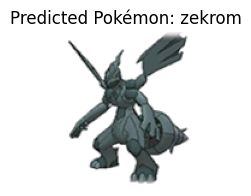

Predicted class: zekrom


In [ ]:
img_path = '/content/split_Data/train/zekrom/zekrom_18.pngN'  # Replace with the path to your image
predicted_class, predictions = predict_image(img_path)
display_image(img_path, predicted_class)
print(f"Predicted class: {predicted_class}")
# print(f"Prediction probabilities: {predictions}")
